1) Tokenizar
2) Embeddings
3) PCA
4) Gráfico

In [1]:
from gensim.models import Word2Vec
import numpy as np
from nltk.tokenize import word_tokenize
import nltk

In [2]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\daniel.martinezcarre\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
text1 = "Lo recuerdo (yo no tengo derecho a pronunciar ese verbo sagrado, sólo un hombre en la tierra tuvo derecho y ese hombre ha muerto) con una oscura pasionaria en la mano, viéndola como nadie la ha visto, aunque la mirara desde el crepúsculo del día hasta el de la noche, toda una vida entera. Lo recuerdo, la cara taciturna y aindiada y singularmente remota, detrás del cigarrillo. Recuerdo (creo) sus manos afiladas de trenzado. Recuerdo cerca de esas manos un mate, con las armas de la Banda Oriental; recuerdo en la ventana de la casa una estera amarilla, con un vago paisaje lacustre. Recuerdo claramente su voz; la voz pausada, resentida y nasal del orillero antiguo, sin los silbidos italianos de ahora. Más de tres veces no lo vi; la última, en 1887... Me parece muy feliz el proyecto de que todos aquellos que lo trataron escriban sobre él; mi testimonio será acaso el más breve y sin duda el más pobre, pero no el menos imparcial del volumen que editarán ustedes."
text2 = "Mi deplorable condición de argentino me impedirá incurrir en el ditirambo -género obligatorio en el Uruguay, cuando el tema es un uruguayo. Literato, cajetilla, porteño; Funes no dijo esas injuriosas palabras, pero de un modo suficiente me consta que yo representaba para él esas desventuras. Pedro Leandro Ipuche ha escrito que Funes era un precursor de los superhombres, 'un Zarathustra cimarrón y vernáculo '; no lo discuto, pero no hay que olvidar que era también un compadrito de Fray Bentos, con ciertas incurables limitaciones."
text3 = "Mi primer recuerdo de Funes es muy perspicuo. Lo veo en un atardecer de marzo o febrero del año 84. Mi padre, ese año, me había llevado a veranear a Fray Bentos. Yo volvía con mi primo Bernardo Haedo de la estancia de San Francisco. Volvíamos cantando, a caballo, y ésa no era la única circunstancia de mi felicidad. Después de un día bochornoso, una enorme tormenta color pizarra había escondido el cielo. La alentaba el viento del Sur, ya se enloquecían los árboles; yo tenía el temor la esperanza) de que nos sorprendiera en un descampado el agua elemental. Corrimos una especie de carrera con la tormenta."

## Tokenización

In [4]:
token1 = word_tokenize(text1.lower())
token2 = word_tokenize(text2.lower())
token3 = word_tokenize(text3.lower())

model = Word2Vec([token1,token2,token3], vector_size=10, window=5,min_count=1, sg=0)

In [5]:
model.wv.index_to_key

[',',
 'de',
 '.',
 'la',
 'el',
 'un',
 'que',
 'en',
 'recuerdo',
 'no',
 ';',
 'y',
 'lo',
 'con',
 'del',
 'mi',
 'una',
 'a',
 'me',
 'yo',
 'los',
 'esas',
 'era',
 ')',
 'pero',
 'ha',
 'funes',
 'ese',
 'más',
 'sin',
 'voz',
 'muy',
 'manos',
 'bentos',
 'año',
 'había',
 'día',
 'es',
 'fray',
 'él',
 '(',
 'hombre',
 'tormenta',
 'derecho',
 'nasal',
 'silbidos',
 'sólo',
 'antiguo',
 'tierra',
 'orillero',
 'pausada',
 'resentida',
 'ahora',
 'tuvo',
 'su',
 'claramente',
 'lacustre',
 'paisaje',
 'italianos',
 'sagrado',
 'desde',
 'pronunciar',
 'trataron',
 'aquellos',
 'todos',
 'tengo',
 'proyecto',
 'feliz',
 'parece',
 'tres',
 'verbo',
 '...',
 '1887',
 'última',
 'vi',
 'veces',
 'vago',
 'crepúsculo',
 'estera',
 'escriban',
 'remota',
 'singularmente',
 'aindiada',
 'taciturna',
 'cara',
 'como',
 'entera',
 'vida',
 'toda',
 'noche',
 'nadie',
 'visto',
 'hasta',
 'aunque',
 'mirara',
 'viéndola',
 'detrás',
 'casa',
 'cigarrillo',
 'ventana',
 'muerto',
 'orien

## Embeddings

In [6]:
embedding1 = sum(model.wv[w] for w in token1) / len(token1)
embedding2 = sum(model.wv[w] for w in token2) / len(token2)
embedding3 = sum(model.wv[w] for w in token3) / len(token3)

In [7]:
from scipy.spatial import distance
cosine_dist = distance.cosine(embedding1, embedding2)
print(cosine_dist)

0.19003552198410034


## PCA
Para reducir dimensionalidades

In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

## Gráfico

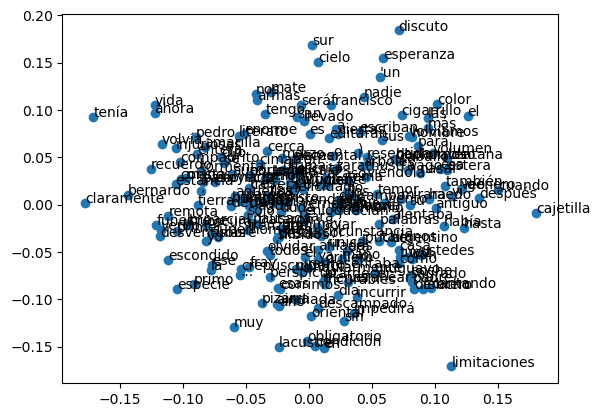

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame([embedding1,embedding2, embedding3])

x = model.wv.vectors

result = pca.fit_transform(X=x)

plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))


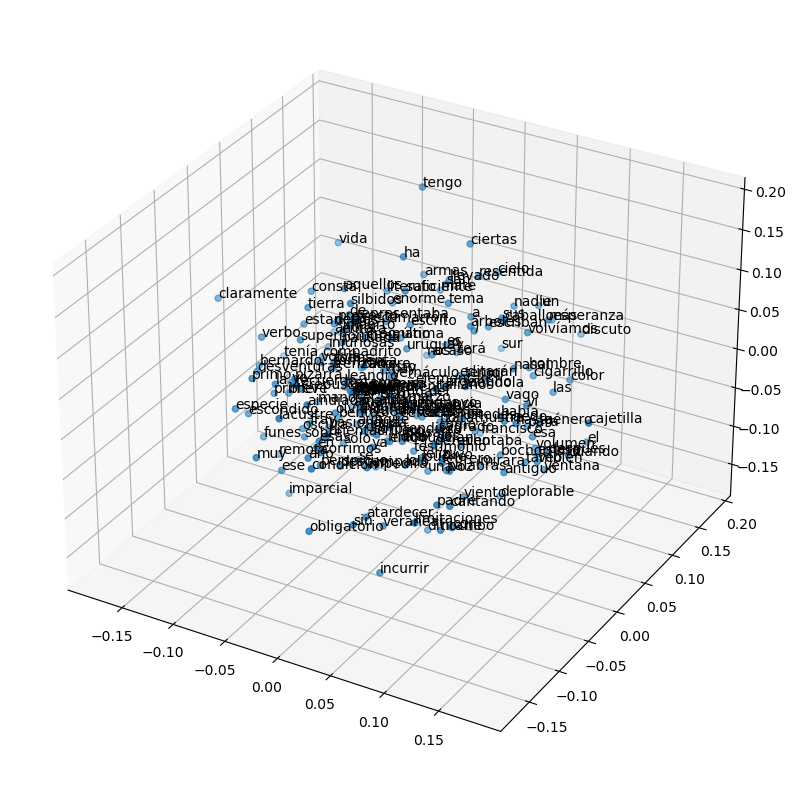

In [10]:
from mpl_toolkits.mplot3d import Axes3D

# Aplicar PCA para reducir la dimensionalidad
pca = PCA(n_components=3)
result = pca.fit_transform(X=x)

# Creación de la figura 3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# Plotea los puntos
ax.scatter(result[:,0], result[:,1], result[:,2])

# Anota las palabras
words = list(model.wv.index_to_key)
for i, word in enumerate(words):
    ax.text(result[i,0], result[i,1], result[i,2], word)


In [31]:
import plotly.express as px

df = pd.DataFrame([result[:,0],result[:,1], words]).transpose()
df.columns = ['x', 'y', 'z']


# Crea la figura de plotly
px.scatter_3d(    
    x=df['x'],  
    y=df['y'],  
    z=df['z'],
)